<a href="https://colab.research.google.com/github/nada59/intelligence-artificielle/blob/main/decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
df=pd.read_csv('titanic-passengers.csv', sep=';')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [24]:
df['Age'] = df['Age'].fillna((df['Age'].mean()))
df.replace({'Survived':{'Yes':1,'No':0}},inplace=True)
df.replace({'Sex':{'female':1,'male':0}},inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.000000,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.000000,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.000000,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,NaN,C
887,61,0,3,"Sirayanian, Mr. Orsen",0,22.000000,0,0,2669,7.2292,NaN,C
888,535,0,3,"Cacic, Miss. Marija",1,30.000000,0,0,315084,8.6625,NaN,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,29.699118,0,0,349215,7.8958,NaN,S


In [25]:
from sklearn.model_selection import train_test_split
X = df.drop(['Survived','PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [26]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,2,0,28.000000,0,0,13.0000
1,3,0,25.000000,0,0,7.6500
2,3,0,20.000000,0,0,7.8542
3,3,1,29.000000,0,4,21.0750
4,1,0,31.000000,1,0,52.0000
...,...,...,...,...,...,...
886,2,1,14.000000,1,0,30.0708
887,3,0,22.000000,0,0,7.2292
888,3,1,30.000000,0,0,8.6625
889,3,0,29.699118,0,0,7.8958


In [27]:
y

0      0
1      0
2      0
3      0
4      0
      ..
886    1
887    0
888    0
889    0
890    1
Name: Survived, Length: 891, dtype: int64

In [28]:
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [33]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=20)
# Train Decision Tree Classifer
clf.fit(X_train, y_train)  
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Accuracy can be computed by comparing actual test set values and predicted values.
accuracy = accuracy_score(y_test, y_pred)

print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.7947761194029851


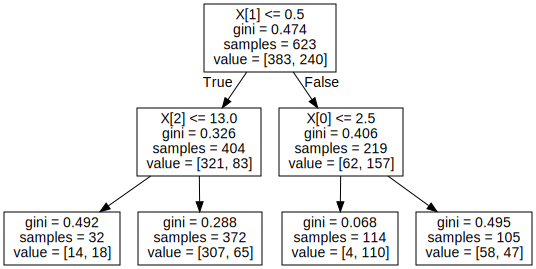

In [52]:
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import  export_graphviz
# graph_data = export_graphviz(tree, out_file=None)
graph_data = export_graphviz(clf, out_file=None)
graph = graphviz.Source(graph_data)
graph.render('data')
graph


In [53]:
# criterion='entropy', max_depth=2
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=20)
clf.fit(X_train, y_train)  # Train
y_pred = clf.predict(X_test)
# Accuracy can be computed by comparing actual test set values and predicted values.
accuracy = accuracy_score(y_test, y_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.7910447761194029


In [54]:
# criterion='gini', max_depth=5
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=20)
clf.fit(X_train, y_train)  # Train
y_pred = clf.predict(X_test)
# Accuracy can be computed by comparing actual test set values and predicted values.
accuracy = accuracy_score(y_test, y_pred)

print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.8208955223880597


In [55]:
# criterion='entropy', max_depth=5
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=20)
clf.fit(X_train, y_train)  # Train
y_pred = clf.predict(X_test)
# Accuracy can be computed by comparing actual test set values and predicted values.
accuracy = accuracy_score(y_test, y_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.8395522388059702


In [57]:
#Comparison between the different combinaisons demonstrates that criterion='entropy', max_depth=5 gives the best results
#The obtained results using the 'entropy' criterion are slightly better than 'gini' criterion.

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Create a Random Forest Classifier
n_estimators=[50, 100, 150, 200, 250, 300]

Acc=[]
for i in range(len(n_estimators)):
    clf=RandomForestClassifier(n_estimators[i], random_state=20)
    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy=",metrics.accuracy_score(y_test, y_pred))
    Acc.append(metrics.accuracy_score(y_test, y_pred))

Accuracy= 0.8134328358208955
Accuracy= 0.8097014925373134
Accuracy= 0.8059701492537313
Accuracy= 0.8097014925373134
Accuracy= 0.8097014925373134
Accuracy= 0.8059701492537313


In [59]:
# Random Forest is suitable for situations when we have a large dataset, and interpretability is
# not a major concern. Decision trees are much easier to interpret and understand. Since a random forest
# combines multiple decision trees, it becomes more difficult to interpret. In our dataset 
#(Titanic) the dataset is small, so decision tree is better than Random Forest.
